# t-SNE

In [96]:
pip install plotly

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.manifold import TSNE


Get the latent representations of test images and their corresponding classification:
The corresponding experiment is run on the AE with a latent dimension of 5 using 30 epochs.

In [4]:
lat_repr = np.load("../test_results/test_lat_repr31-07-2022npy")
cl_new = np.load("../test_results/test_true_class31-07-2022.npy")
view_class = np.load("../test_results/test_true_view_class31-07-2022.npy")


Define the t-SNE plot:

In [210]:
tsne = TSNE(perplexity=30, n_components=2)
lat_r_t = tsne.fit_transform(lat_repr)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [223]:
lat_0 = lat_r_t[np.where(cl_new == 0)]
lat_10 = lat_r_t[np.where(cl_new == 10)]
lat_8 = lat_r_t[np.where(cl_new == 8)]
lat_11 = lat_r_t[np.where(cl_new == 11)]

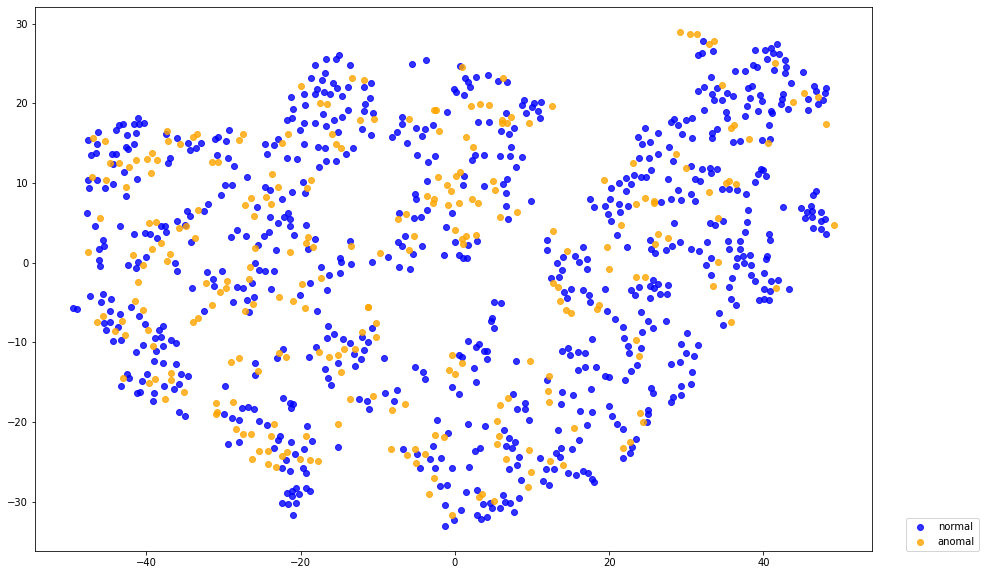

In [237]:
plt.figure(figsize=(15, 10))

# 0
plt.scatter(lat_0[:, 0], lat_0[:, 1], c ="blue", alpha=0.8, label='normal')
# plt.scatter(lat_10[:, 0], lat_10[:, 1], c ="green", alpha=0.8, label='normal, artifact')
plt.scatter(lat_8[:, 0], lat_8[:, 1], c ="orange", alpha=0.8, label='anomal')
# plt.scatter(lat_11[:, 0], lat_11[:, 1], c ="cyan", alpha=0.8, label='anomal, artifact')
plt.legend(loc=(1.04,0))
# plt.show()

In [228]:
lat_0_0 = lat_r_t[np.where((cl_new == 0) & (view_class == 0))]
lat_0_1 = lat_r_t[np.where((cl_new == 0) & (view_class == 1))]
lat_0_2 = lat_r_t[np.where((cl_new == 0) & (view_class == 2))]
lat_0_3 = lat_r_t[np.where((cl_new == 0) & (view_class == 3))]

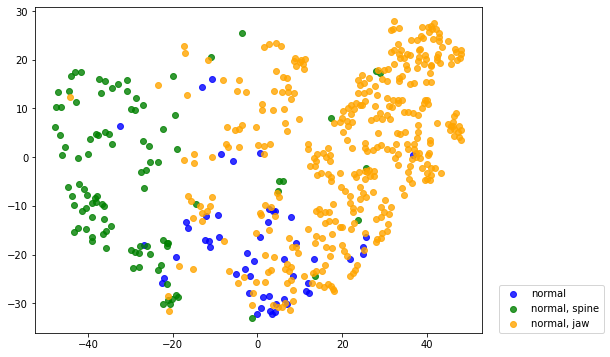

In [231]:
plt.figure(figsize=(8, 6))

# 0
plt.scatter(lat_0_0[:, 0], lat_0_0[:, 1], c ="blue", alpha=0.8, label='normal')
plt.scatter(lat_0_1[:, 0], lat_0_1[:, 1], c ="green", alpha=0.8, label='normal, spine')
plt.scatter(lat_0_2[:, 0], lat_0_2[:, 1], c ="orange", alpha=0.8, label='normal, jaw')
# plt.scatter(lat_0_3[:, 0], lat_0_3[:, 1], c ="cyan", alpha=0.8, label='normal, spine and jaw')
plt.legend(loc=(1.04,0))
# plt.show()